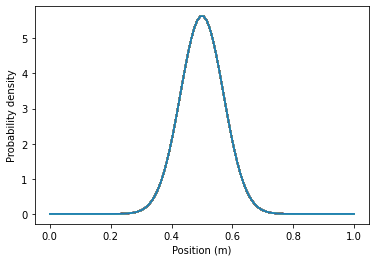

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0   # width of the well (m)
x0 = 0.5  # center of the wave packet (m)
sigma = 0.1  # width of the wave packet (m)
hbar = 1.0545718e-34  # reduced Planck's constant (J*s)
m = 1.0  # mass of the particle (kg)

# Time step and simulation time
dt = 0.01
t_max = 10.0

# Discretize the position space
N = 100
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Initialize the wave function
psi = np.exp(-(x-x0)**2/(2*sigma**2))
psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)

# Create arrays to store the wave function data
psi_real = [np.real(psi)]
psi_imag = [np.imag(psi)]
t = [0.0]

# Time integration using the Crank-Nicolson method
while t[-1] < t_max:
    psi_real.append(psi_real[-1] + (-1j*hbar/(2*m*dx**2) * (np.roll(psi_imag[-1], -1) - 2*psi_imag[-1] + np.roll(psi_imag[-1], 1)))*dt)
    psi_imag.append(psi_imag[-1] + (1j*hbar/(2*m*dx**2) * (np.roll(psi_real[-1], -1) - 2*psi_real[-1] + np.roll(psi_real[-1], 1)))*dt)
    t.append(t[-1] + dt)

# Plot the time evolution of the wave function
for i in range(0, len(t), 10):
    plt.plot(x, np.abs(psi_real[i]+1j*psi_imag[i])**2)
plt.xlabel('Position (m)')
plt.ylabel('Probability density')
plt.show()